## Features Explanation:
The following describes the columns present in the data.
* CustomerID -- Unique identifier of the customers
* Gender -- Whether the customer is a male or a female
* SeniorCitizen -- Whether a customer is a senior citizen or not
* Partner -- Whether the customer has a partner or not (Yes, No)
* Dependents -- Whether the customer has dependents or not (Yes, No)
* Tenure -- Number of months the customer has stayed with the company
* Phone Service -- Whether the customer has a phone service or not (Yes, No)
* MultipleLines -- Whether the customer has multiple lines or not
* InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)
* OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)
* OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)
* DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)
* StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
* Contract -- The contract term of the customer (Month-to-Month, One year, Two year)
* PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)
* Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
* MonthlyCharges -- The amount charged to the customer monthly
* TotalCharges -- The total amount charged to the customer
* Churn -- Whether the customer churned or not (Yes or No)    

# QUESTIONS:
1) Does age factor affect the customers churn rate?
2) Among customers who have churned, which type of contract is most prevalent?
3) Which gender has the higest rate of churning
4) What is the percentage breakdown of customers who have left the company? (Pie chart)
5) Is there a correlation between total charges and the type of contract? (Bar chart)
6) How does the churn rate vary based on the duration of customer subscription (tenure)?

In [460]:
import pandas as pd
from dotenv import dotenv_values
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
import pyodbc



In [461]:
login = dotenv_values('.env')

In [462]:
PASS = login.get('password')
USER = login.get('user')
SERVER = login.get('server')
DATABASE = login.get('dbname')

In [463]:
connection = f"DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USER};PWD={PASS};"

In [464]:
conn = pyodbc.connect(connection)

In [465]:
query = '''SELECT *
        FROM dbo.LP2_Telco_churn_first_3000'''


In [466]:
df = pd.read_sql_query(query,conn)

df.head(3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13196\3855960581.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [467]:
df.shape

(3000, 21)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [469]:
# Testing dataset
df2 = pd.read_excel('Telco-churn-second-2000.xlsx')
df2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55


In [470]:
df2.shape

(2000, 20)

In [471]:
# Evaluation dataset
df3 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
df3.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [472]:
df3.shape

(2043, 21)

In [473]:
df.shape

(3000, 21)

## Concate the Data(df & df3)

In [474]:
data= pd.concat([df,df3],ignore_index=True,verify_integrity=True,axis=0)
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


## EDA

In [475]:
data.shape

(5043, 21)

In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [477]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


### * To check duplicates

In [478]:
data.duplicated().sum()

0

### * To check missing data

In [479]:
data.isna().sum().sum()

4181

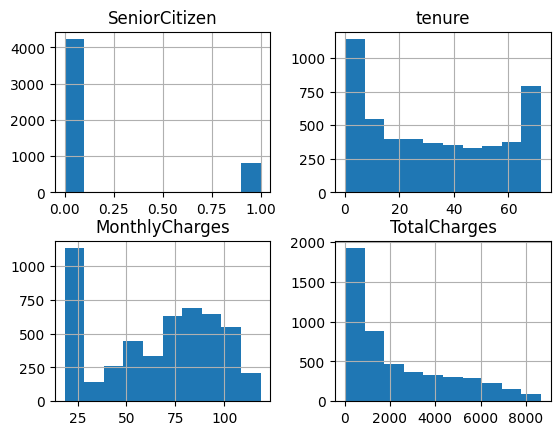

In [480]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors='coerce')
data.hist();

In [481]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [496]:
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5043,5043,5043,5043,5043,4774,5043,4392,4392,4392,4392,4392,4392,5043,5043,5043,5042
unique,5043,2,4,4,4,5,3,5,5,5,5,5,5,3,4,4,2
top,7590-VHVEG,Male,False,False,True,False,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,No
freq,1,2559,1538,2070,2731,1437,2248,1478,1320,1296,1476,1190,1199,2744,1776,1700,3706


# ANSWER THE QUESTIONS:

### 1) Does age factor affect the customers churn rate?

In [482]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [483]:
data['gender'].unique()


array(['Female', 'Male'], dtype=object)

In [484]:
data['Churn'].unique()


array([False, True, None, 'No', 'Yes'], dtype=object)

In [485]:
data['Churn'] = data['Churn'].replace({'No':False, 'Yes':True})

In [486]:
data['Churn'].unique()

array([False, True, None], dtype=object)

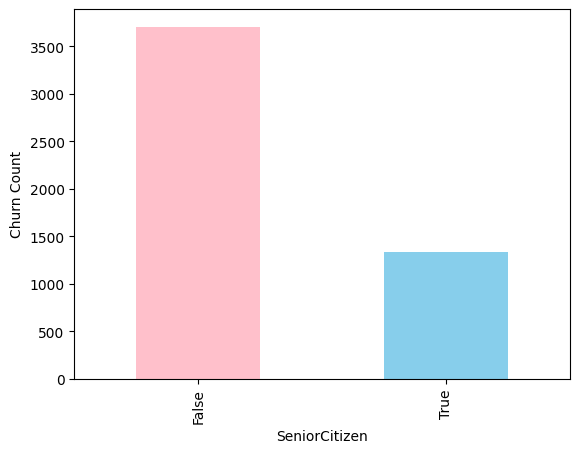

In [487]:
data['Churn'] = data['Churn'].replace({'No':False, 'Yes':True})
(
    data.groupby('Churn')['SeniorCitizen']
    .count().plot(kind='bar',ylabel='Churn Count',xlabel='SeniorCitizen',color=('pink','skyblue'))
    
);

 Among customers who have churned, which type of contract is most prevalent?

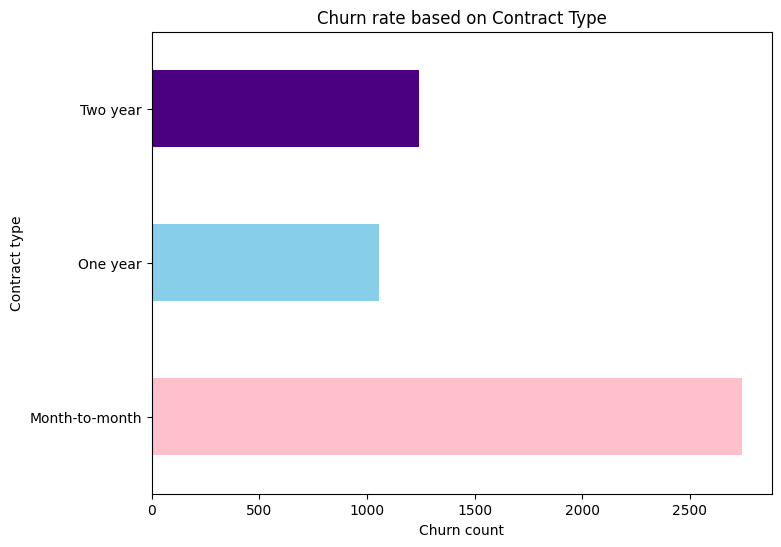

In [488]:
contract_churn = (
    data.groupby('Contract')['Churn'].count()
)

plt.figure(figsize=(8,6))
contract_churn.plot(kind='barh', color=['pink','skyblue','indigo'])
plt.title('Churn rate based on Contract Type')
plt.ylabel('Contract type')
plt.xlabel('Churn count');

## 3) Which gender has the higest rate of churning

In [489]:
#data['Churn'].unique()
data['Churn'] = data['Churn'].replace({False:'No',True:'Yes'})

In [490]:
data['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

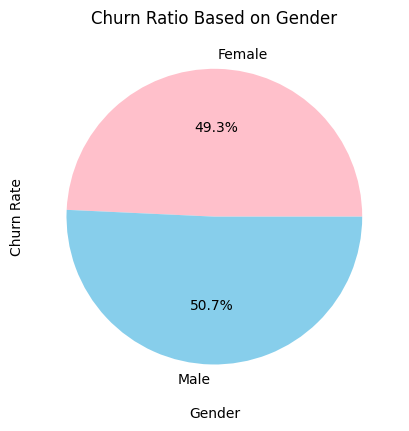

In [491]:
data['Churn'] = data['Churn'].replace({False:'No',True:'Yes'})
gender = data.groupby('gender')['Churn'].count()
gender.plot(kind='pie', colors=['pink','skyblue'], autopct='%1.1f%%')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Ratio Based on Gender')
plt.show();

### 4) What is the percentage breakdown of customers who have left the company? (Pie chart)

In [518]:
data['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

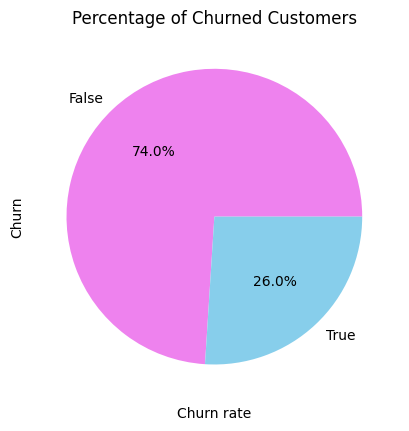

In [521]:
left = df.groupby('Churn')['Churn'].count()

left.plot(kind='pie', colors=['violet','skyblue'], autopct='%1.1f%%')
plt.xlabel('Churn rate')
#plt.ylabel('Churn Rate')
plt.title('Percentage of Churned Customers')
plt.show();

### 5) Is there a correlation between total charges and the type of contract? (Bar chart)

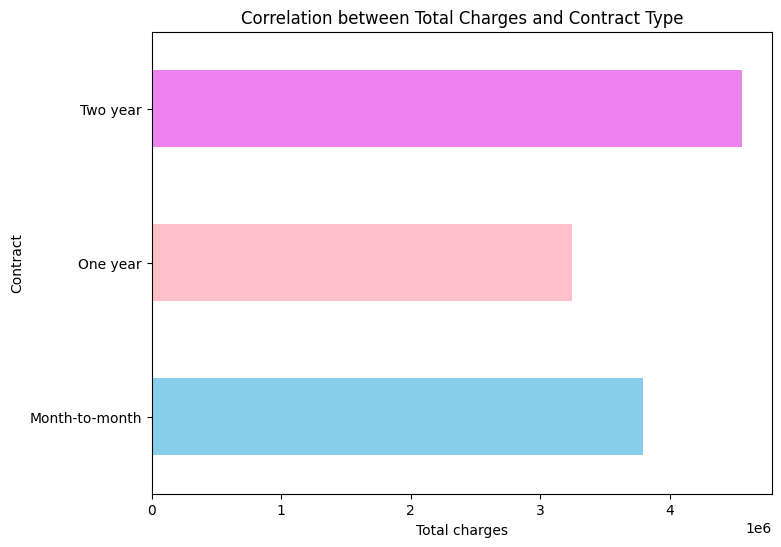

In [522]:
corr_charges_contract = data.groupby('Contract')['TotalCharges'].sum()

plt.figure(figsize=(8,6))
corr_charges_contract.plot(kind='barh',color=['skyblue','pink','violet'])
plt.xlabel('Total charges')
plt.title('Correlation between Total Charges and Contract Type')
plt.show()

### 6) How does the churn rate vary based on the duration of customer subscription (tenure)?

In [506]:
data['tenure'].max()

72

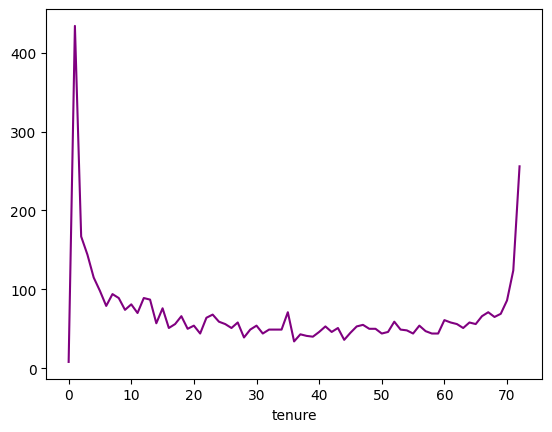

In [524]:
#groups = [0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74]
Sub = data.groupby('tenure')['Churn'].count()
Sub.plot(kind='line',color='purple')
labels= ()